# Phân loại, xếp loại học lực của sinh viên dựa trên dữ liệu học thuật và xã hội.

## Bộ dữ liệu
- **Nguồn**: [UCI Student Performance](https://archive.ics.uci.edu/ml/datasets/Student+Performance)
- **Mô tả**: Bộ dữ liệu chứa thông tin về học lực của sinh viên dựa trên các yếu tố học thuật và xã hội. Dữ liệu bao gồm các thuộc tính như điểm số, thời gian học tập, hoàn cảnh gia đình, và các yếu tố xã hội khác. Thông tin chi tiết về bộ dữ liệu có thể được tìm thấy trong liên kết trên.

## Mô hình
Sử dụng thuật toán Random Forest để phân loại học lực của sinh viên thành các nhóm như "Giỏi", "Khá", "Trung bình", "Yếu" và "Kém".

In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score


In [15]:
# Load dataset
data = pd.read_csv('data/student-mat.csv', sep=';')
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [16]:
# Data exploration
print('Shape of the dataset:', data.shape)
print('Missing values in each column:')
print(data.isnull().sum())

Shape of the dataset: (395, 33)
Missing values in each column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [17]:
# Labeling the performance
def label_performance(grade):
    if grade >= 16:
        return 'Giỏi'
    elif grade >= 14:
        return 'Khá'
    elif grade >= 10:
        return 'Trung bình'
    elif grade >= 5:
        return 'Yếu'
    else:
        return 'Kém'

data['performance'] = data['G3'].apply(label_performance)

In [18]:
# Feature selection
X = data.drop(columns=['G3', 'performance'])
y = data['performance']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

print('Categorical features:', categorical_features)
print('Numerical features:', numerical_features)

Categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Numerical features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [19]:
# Missing value imputation
numercial_transformer = SimpleImputer(strategy='mean')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [20]:
# Preprocessing and model pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numercial_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Model training
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [23]:
# Prediction
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

label_order = ['Giỏi', 'Khá', 'Trung bình', 'Yếu', 'Kém']

print("\nClassification Report (test):")
print(classification_report(y_test, y_pred, digits=4, labels=label_order))

acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")

# Precision, Recall, F1 (macro & weighted)
precision_macro = precision_score(y_test, y_pred, average="macro")
recall_macro = recall_score(y_test, y_pred, average="macro")
f1_macro = f1_score(y_test, y_pred, average="macro")

precision_weighted = precision_score(y_test, y_pred, average="weighted")
recall_weighted = recall_score(y_test, y_pred, average="weighted")
f1_weighted = f1_score(y_test, y_pred, average="weighted")

print("\n--- Macro Averages (cân bằng giữa các lớp) ---")
print(f"Precision (macro): {precision_macro:.4f}")
print(f"Recall (macro): {recall_macro:.4f}")
print(f"F1-score (macro): {f1_macro:.4f}")

print("\n--- Weighted Averages (theo tỉ lệ mẫu) ---")
print(f"Precision (weighted): {precision_weighted:.4f}")
print(f"Recall (weighted): {recall_weighted:.4f}")
print(f"F1-score (weighted): {f1_weighted:.4f}")



Classification Report (test):
              precision    recall  f1-score   support

        Giỏi     0.8000    0.4000    0.5333        10
         Khá     0.6667    0.6250    0.6452        16
  Trung bình     0.7000    0.8077    0.7500        26
         Yếu     0.6538    0.7727    0.7083        22
         Kém     0.3333    0.2000    0.2500         5

    accuracy                         0.6709        79
   macro avg     0.6308    0.5611    0.5774        79
weighted avg     0.6698    0.6709    0.6581        79

Accuracy: 0.6709
Balanced Accuracy: 0.5611

--- Macro Averages (cân bằng giữa các lớp) ---
Precision (macro): 0.6308
Recall (macro): 0.5611
F1-score (macro): 0.5774

--- Weighted Averages (theo tỉ lệ mẫu) ---
Precision (weighted): 0.6698
Recall (weighted): 0.6709
F1-score (weighted): 0.6581


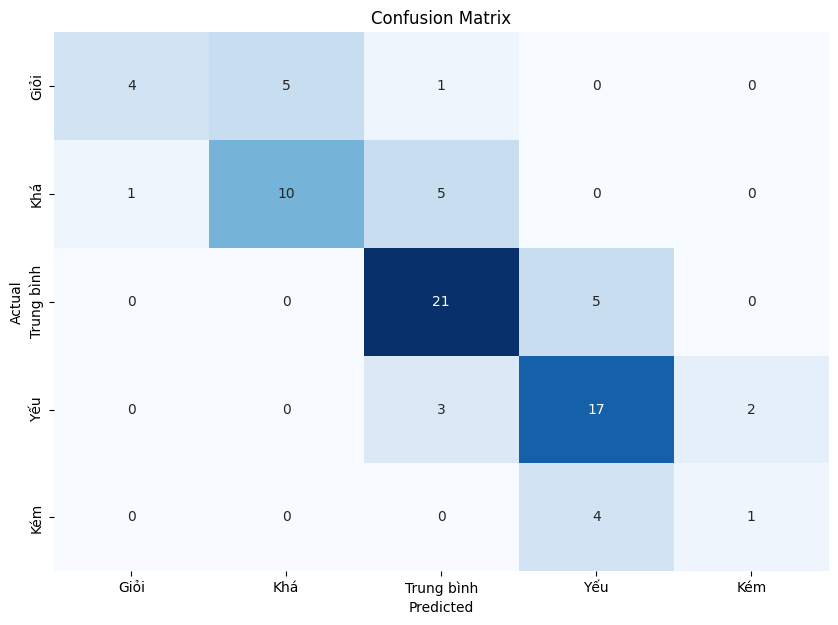

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=label_order)  # Use the desired order in labels
cm_df = pd.DataFrame(cm, index=label_order, columns=label_order)  # Set index and columns explicitly

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
# Feature Importance
ohe = model.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, cat_feature_names])

importances = model.named_steps["classifier"].feature_importances_

feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
              Feature  Importance
14                 G2    0.238691
13                 G1    0.124854
12           absences    0.066632
10               Walc    0.029512
8               goout    0.026553
11             health    0.025789
0                 age    0.025663
2                Fedu    0.022191
7            freetime    0.021790
1                Medu    0.020410
4           studytime    0.020298
5            failures    0.020164
6              famrel    0.018257
3          traveltime    0.012652
32         Fjob_other    0.011642
56        romantic_no    0.011309
9                Dalc    0.011305
28      Mjob_services    0.011134
27         Mjob_other    0.010630
35      reason_course    0.010318
44          famsup_no    0.010300
46            paid_no    0.010291
57       romantic_yes    0.010086
45         famsup_yes    0.009724
22        famsize_LE3    0.009289
33      Fjob_services    0.009149
18              sex_M    0.009031
47           paid_yes    0

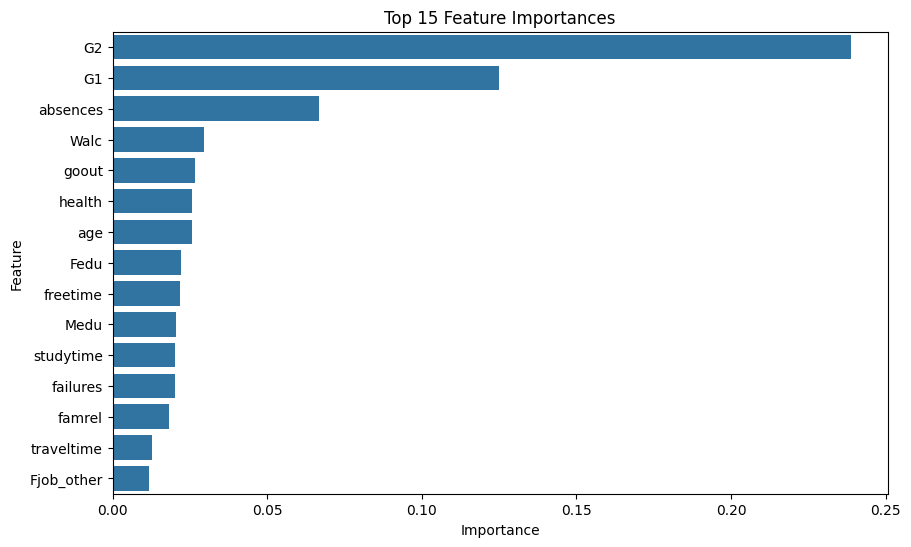

In [26]:
# Top 15 feature importance
top_features = feature_importance_df.head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features['Importance'], y=top_features['Feature'])
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()